# 전국 기온 데이터 수집
- 기상자료개방포털<br>
    https://data.kma.go.kr
<br><br>

- 기상자료개발포털>데이터>기상관측>지상>종관기상관측(ASOS)<br>
    https://data.kma.go.kr/data/grnd/selectAsosRltmList.do?pgmNo=36<br>
    회원가입/로그인필요<br>
    [자료형태]일자료<br>
    [지점]전체<br>
    [자료]기온>최저,최고,평균<br>
    [기간]1911~2020(10년단위로 나누어 다운로드)
    

# 전국 기온 데이터 확인
- 데이터프레임 생성하고 데이터 살펴보기

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# 그래프에 한글 설정
plt.rcParams['font.family']='AppleGothic'

# 그래프에 마이너스 기호 깨지는 문제 해결
plt.rcParams['axes.unicode_minus']=False

## 데이터프레임 생성
- 데이터 파일(csv)을 data풀더에 업로드한다.
- pd.read_csv(파일경로, encoding='cp949')

In [13]:
df_1911 = pd.read_csv('../data/1911_1920_일별기온.csv', encoding='cp949')
df_1921 = pd.read_csv('../data/1921_1930_일별기온.csv', encoding='cp949')
df_1931 = pd.read_csv('../data/1931_1940_일별기온.csv', encoding='cp949')
df_1941 = pd.read_csv('../data/1941_1950_일별기온.csv', encoding='cp949')
df_1951 = pd.read_csv('../data/1951_1960_일별기온.csv', encoding='cp949')
df_1961 = pd.read_csv('../data/1961_1970_일별기온.csv', encoding='cp949')
df_1971 = pd.read_csv('../data/1971_1980_일별기온.csv', encoding='cp949')
df_1981 = pd.read_csv('../data/1981_1990_일별기온.csv', encoding='cp949')
df_1991 = pd.read_csv('../data/1991_2000_일별기온.csv', encoding='cp949')
df_2001 = pd.read_csv('../data/2001_2010_일별기온.csv', encoding='cp949')
df_2011 = pd.read_csv('../data/2011_2020_일별기온.csv', encoding='cp949')


In [35]:
df_1991.tail()

,지점,지점명,일시,평균기온(°C),최저기온(°C),최고기온(°C)
268370,295,남해,2000-12-27,-0.5,-5.3,4.2
268371,295,남해,2000-12-28,2.3,-2.5,8.6
268372,295,남해,2000-12-29,1.7,-3.1,8.6
268373,295,남해,2000-12-30,4.0,-0.5,9.8
268374,295,남해,2000-12-31,2.5,-4.1,6.9


## 데이터프레임 연결하기
- pd.concat(데이터프레임리스트, axis=0) : 행방향으로 연결(default)
- pd.concat(데이터프레임리스트, axis=1) ; 열방향으로 연결
- ignore_index=True: 인덱스 재지정

In [39]:
df = pd.concat([df_1911, df_1921,df_1931,df_1941,df_1951,df_1961,df_1971,df_1981,df_1991,df_2001,df_2011]
              , ignore_index=True)

In [40]:
df

,지점,지점명,일시,평균기온(°C),최저기온(°C),최고기온(°C)
0,105,강릉,1911-10-04,NaN,12.2,26.2
1,105,강릉,1911-10-09,NaN,6.0,16.6
2,105,강릉,1911-10-16,NaN,9.2,15.5
3,105,강릉,1911-11-01,NaN,6.0,14.8
4,105,강릉,1911-11-04,NaN,10.2,19.5
...,...,...,...,...,...,...
1597071,295,남해,2020-12-27,4.4,2.5,6.0
1597072,295,남해,2020-12-28,4.7,1.1,11.5
1597073,295,남해,2020-12-29,5.4,1.0,11.2
1597074,295,남해,2020-12-30,-3.0,-5.4,1.6


## 데이터 타입 확인/변경
### 데이터타입 확인
- 데이터프레임.dtypes

In [41]:
# 데이터타입 확인
df.dtypes

지점            int64
지점명          object
일시           object
평균기온(°C)    float64
최저기온(°C)    float64
최고기온(°C)    float64
dtype: object

### 데이터타입 변경
- `pd.to_datetime(컬럼)` : datetime형으로 변경

In [45]:
# '일시' 컬럼을 datetime 형으로 변경
df['일시']=pd.to_datetime(df['일시'])

In [46]:
# 변경 확인
df.dtypes

지점                   int64
지점명                 object
일시          datetime64[ns]
평균기온(°C)           float64
최저기온(°C)           float64
최고기온(°C)           float64
dtype: object

## 데이터크기확인
- `데이터프레임.shape`

In [48]:
df.shape

(1597076, 6)

## 데이터 정보 확인
- `데이터프레임.info()`

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1597076 entries, 0 to 1597075
Data columns (total 6 columns):
 #   Column    Non-Null Count    Dtype         
---  ------    --------------    -----         
 0   지점        1597076 non-null  int64         
 1   지점명       1597076 non-null  object        
 2   일시        1597076 non-null  datetime64[ns]
 3   평균기온(°C)  1594864 non-null  float64       
 4   최저기온(°C)  1596878 non-null  float64       
 5   최고기온(°C)  1596907 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 73.1+ MB


## 데이터 내용 확인
### 지점명, 지점명의 개수 확인
- 컬럼.unique(): 컬럼의 중복을 배제한 값 목록
- 컬럼.nunique() : 컬럼의 중복을 배제한 값 개수

In [50]:
# 지점명 확인
df['지점명'].unique()

array(['강릉', '서울', '인천', '대구', '전주', '부산', '목포', '제주', '울릉도', '추풍령', '광주',
       '포항', '울산', '여수', '속초', '춘천', '수원', '서산', '청주', '대전', '군산', '통영',
       '서귀포', '진주', '임실', '정읍', '대관령', '원주', '충주', '울진', '안동', '완도', '성산',
       '강화', '양평', '이천', '인제', '홍천', '삼척', '제천', '보은', '천안', '보령', '부여',
       '금산', '부안', '남원', '고창군', '주암', '장흥', '해남', '고흥', '성산포', '영주', '문경',
       '영덕', '의성', '구미', '영천', '거창', '합천', '밀양', '산청', '거제', '남해', '철원',
       '관악산', '창원', '고산', '태백', '장수', '봉화', '동두천', '백령도', '동해', '영월',
       '무안', '흑산도', '파주', '북강릉', '상주', '고창', '진도(첨찰산)', '정선군', '영광군',
       '김해시', '순창군', '북창원', '양산시', '보성군', '강진군', '의령군', '함양군', '청송군',
       '경주시', '북춘천', '순천', '대구(기)', '홍성', '세종', '광양시', '진도군'],
      dtype=object)

In [51]:
# 지점명 개수 확인
df['지점명'].nunique()

102

### 연도의 개수 확인
- datetime에서 연도, 월, 일 가져오기<br>
    `컬럼.dt.year` `컬럼.dt.month` `컬럼.dt.day`

In [53]:
df['일시'].dt.year.nunique()

110

### 연도별 데이터 개수 확인

In [54]:
df['일시'].dt.year.value_counts()

2020    34767
2019    34738
2018    34673
2017    34668
2016    34496
        ...  
1917     2190
1915     2190
1914     2190
1913     2190
1911     1836
Name: 일시, Length: 110, dtype: int64

### 지점별 데이터 개수 확인

In [55]:
df['지점명'].value_counts()

부산       40178
목포       40178
대구       40178
인천       39690
강릉       39509
         ...  
진도군       2423
홍성        1885
북춘천       1553
대구(기)      619
세종         581
Name: 지점명, Length: 102, dtype: int64

# 서울시 기온 데이터 추출 및 확인
## 서울시 데이터만 추출하여 서브셋 생성
- 조건으로 데이터를 추출하여 서브셋을 만들 때, copy본으로 만드는 것을 권장 : .copy()

In [59]:
df_seoul = df[df['지점명']=='서울'].copy()
df_seoul

,지점,지점명,일시,평균기온(°C),최저기온(°C),최고기온(°C)
3299,108,서울,1911-01-01,-10.1,-14.2,-6.5
3300,108,서울,1911-01-02,-12.5,-19.7,-5.9
3301,108,서울,1911-01-03,-4.3,-10.2,-1.4
3302,108,서울,1911-01-04,0.8,-2.6,2.2
3303,108,서울,1911-01-05,-3.9,-8.7,1.7
...,...,...,...,...,...,...
1295817,108,서울,2020-12-27,5.8,1.4,10.0
1295818,108,서울,2020-12-28,6.7,4.2,11.4
1295819,108,서울,2020-12-29,0.1,-6.2,4.3
1295820,108,서울,2020-12-30,-10.9,-12.9,-6.2


## 결측치 분석
- `데이터프레임.isnull().sum()`

In [61]:
# 결측치 확인
df_seoul.isnull().sum()

지점          0
지점명         0
일시          0
평균기온(°C)    0
최저기온(°C)    2
최고기온(°C)    3
dtype: int64

In [66]:
# 결측치가 있는 데이터 보기
df_seoul[(df_seoul['최저기온(°C)'].isnull()) | (df_seoul['최고기온(°C)'].isnull())]

,지점,지점명,일시,평균기온(°C),최저기온(°C),최고기온(°C)
181291,108,서울,1967-02-19,-1.7,NaN,NaN
254319,108,서울,1973-10-16,12.3,NaN,NaN
1294645,108,서울,2017-10-12,11.4,8.8,NaN


## 결측치 제거
- `데이터프레임.dropna()` : 결측치가 포함된 행을 모두 제거

In [68]:
# 결측치 제거
df_seoul = df_seoul.dropna()

In [69]:
# 결측치 확인
df_seoul.isnull().sum(0)

지점          0
지점명         0
일시          0
평균기온(°C)    0
최저기온(°C)    0
최고기온(°C)    0
dtype: int64

In [70]:
# 데이터프레임의 크기
df_seoul.shape

(38988, 6)

## 연도별 데이터 개수 확인

In [73]:
# 연도별 데이터 개수 확인
df_seoul['일시'].dt.year.value_counts(0)

1968    366
2008    366
1944    366
1912    366
2004    366
       ... 
1967    364
2017    364
1973    364
1950    243
1953     31
Name: 일시, Length: 108, dtype: int64

## 시각화로 데이터 확인
- 최저기온
- 평균기온
- 최고기온

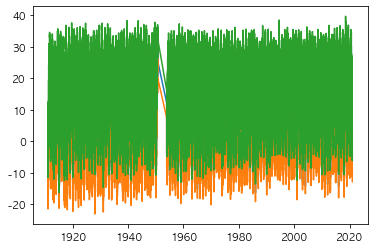

In [75]:
plt.plot(df_seoul['일시'], df_seoul['평균기온(°C)'])
plt.plot(df_seoul['일시'], df_seoul['최저기온(°C)'])
plt.plot(df_seoul['일시'], df_seoul['최고기온(°C)'])


In [76]:
# 1951년 데이터 추출
df_seoul['일시'].dt.year==1951

3299       False
3300       False
3301       False
3302       False
3303       False
           ...  
1295817    False
1295818    False
1295819    False
1295820    False
1295821    False
Name: 일시, Length: 38988, dtype: bool